# Results

## Import dependencies

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## Define Data

In [55]:
data = {
    "v1": [
        {
            "Model": "gpt-4o-mini",
            "Accuracy": 0.86,
            "POS_Precision": 0.80,
            "POS_Recall": 0.96,
            "NEG_Precision": 0.95,
            "NEG_Recall": 0.74,
            "CM": [
                [502, 19],
                [126, 362]
            ]
        },
        {
            "Model": "gpt-5-mini",
            "Accuracy": 0.81,
            "POS_Precision": 0.73,
            "POS_Recall": 0.99,
            "NEG_Precision": 0.99,
            "NEG_Recall": 0.61,
            "CM": [
                [517, 4],
                [190, 298]
            ]
        }
    ],
    "v2": [
        {
            "Model": "gpt-4o-mini",
            "Accuracy": 0.76,
            "POS_Precision": 0.78,
            "POS_Recall": 0.74,
            "NEG_Precision": 0.74,
            "NEG_Recall": 0.78,
            "CM": [
                [388, 133],
                [107, 381]
            ]
        },
        {
            "Model": "gpt-5-mini",
            "Accuracy": 0.85,
            "POS_Precision": 0.82,
            "POS_Recall": 0.91,
            "NEG_Precision": 0.90,
            "NEG_Recall": 0.79,
            "CM": [
                [476, 45],
                [102, 386]
            ]
        }
    ],
    "v3": [
        {
            "Model": "gpt-4o-mini",
            "Accuracy": 0.86,
            "POS_Precision": 0.83,
            "POS_Recall": 0.93,
            "NEG_Precision": 0.91,
            "NEG_Recall": 0.79,
            "CM": [
                [483, 38],
                [102, 386]
            ]
        },
        {
            "Model": "gpt-5-mini",
            "Accuracy": 0.87,
            "POS_Precision": 0.84,
            "POS_Recall": 0.92,
            "NEG_Precision": 0.90,
            "NEG_Recall": 0.81,
            "CM": [
                [477, 45],
                [91, 397]
            ]
        }
    ],
    "v4": [
        {
            "Model": "gpt-4o-mini",
            "Accuracy": 0.79,
            "POS_Precision": 0.83,
            "POS_Recall": 0.75,
            "NEG_Precision": 0.76,
            "NEG_Recall": 0.83,
            "CM": [
                [393, 128],
                [81, 407]
            ]
        },
        {
            "Model": "gpt-5-mini",
            "Accuracy": 0.85,
            "POS_Precision": 0.87,
            "POS_Recall": 0.84,
            "NEG_Precision": 0.83,
            "NEG_Recall": 0.87,
            "CM": [
                [436, 85],
                [64, 424]
            ]
        }
    ],
    "v5": [
        {
            "Model": "gpt-4o-mini",
            "Accuracy": 0.76,
            "POS_Precision": 0.87,
            "POS_Recall": 0.63,
            "NEG_Precision": 0.70,
            "NEG_Recall": 0.90,
            "CM": [
                [329, 192],
                [50, 438]
            ]
        },
        {
            "Model": "gpt-5-mini",
            "Accuracy": 0.88,
            "POS_Precision": 0.88,
            "POS_Recall": 0.90,
            "NEG_Precision": 0.89,
            "NEG_Recall": 0.86,
            "CM": [
                [470, 51],
                [67, 421]
            ]
        }
    ]
}


## Define Prompts

In [56]:
prompts = {
    "v1": """
    Clasifica el siguiente tweet como POSITIVE o NEGATIVE según estos criterios:

    POSITIVE: cumple con uno o más de los siguientes:
    - El usuario del tweet habla de cómo o qué tipo de droga ilícita está consumiendo.
    - El usuario del tweet expresa la necesidad de consumir drogas ilícitas, ya sea por abstinencia o por gusto.
    - El usuario añora consumir drogas ilícitas.

    NEGATIVE: no cumple con ningún criterio POSITIVE, por ejemplo:
    - Habla sobre noticias o información general sobre drogas ilícitas.
    - Menciona drogas ilícitas sin relación con consumo problemático o necesidad.
    - Expresa ironía o sarcasmo relacionado con drogas ilícitas.

    Responde únicamente con la palabra POSITIVE o NEGATIVE, sin añadir explicaciones ni otro texto.

    Tweet: {tweet}
    """,
    "v2": """

    """
}

## Create Classification Report heatmap results image

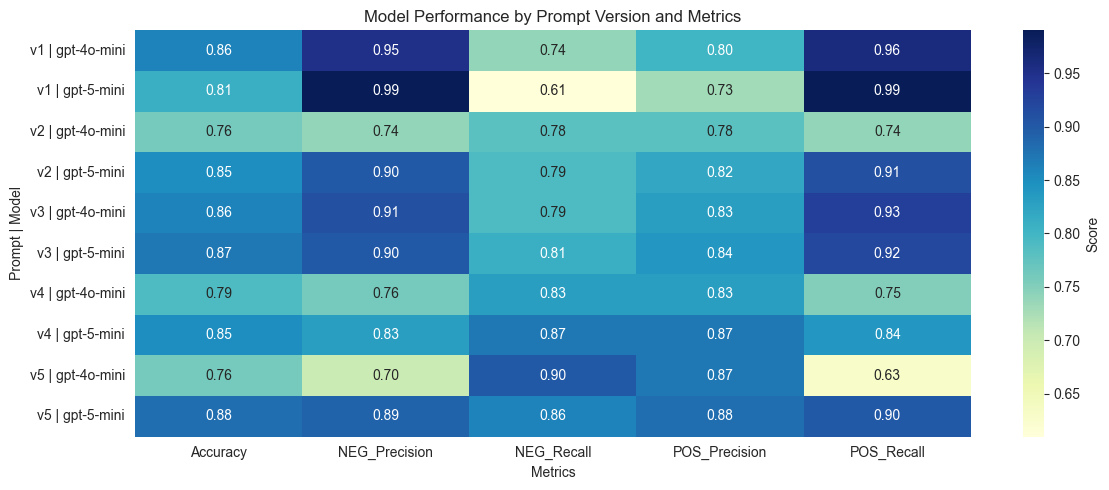

In [57]:
rows = []
for prompt, models in data.items():
    for model_data in models:
        combined_label = f"{prompt} | {model_data['Model']}"
        row = {"Prompt_Model": combined_label}
        for k, v in model_data.items():
            if k != "Model":
                row[k] = v
        rows.append(row)

df = pd.DataFrame(rows)
metrics = ["Accuracy", "NEG_Precision", "NEG_Recall", "POS_Precision", "POS_Recall"]
df.set_index("Prompt_Model", inplace=True)
heatmap_data = df[metrics]

plt.figure(figsize=(12, 5))
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="YlGnBu",    # color map similar to your uploaded image
    fmt=".2f",
    cbar_kws={'label': 'Score'},
)

plt.title("Model Performance by Prompt Version and Metrics")
plt.xlabel("Metrics")
plt.ylabel("Prompt | Model")

plt.yticks(rotation=0, ha='right')

plt.tight_layout()
plt.savefig("../media/results/classification-report-results.png", dpi=300, bbox_inches="tight")
plt.show()

## Create Confusion Matrix heatmap results image

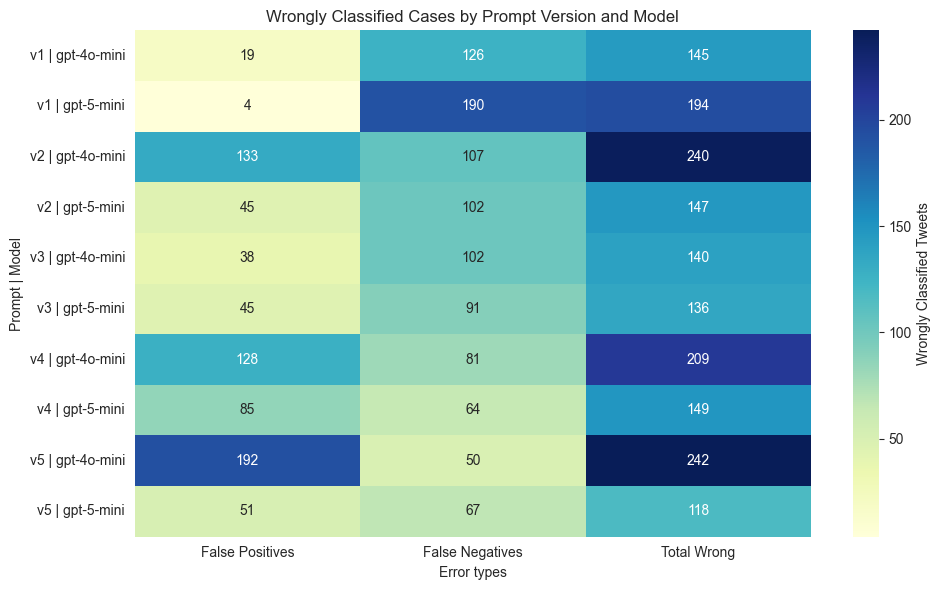

In [58]:
rows = []
for prompt, models in data.items():
    for model_data in models:
        cm = np.array(model_data["CM"])
        fp = cm[0,1]  # False Positives
        fn = cm[1,0]  # False Negatives
        total_wrong = fp + fn
        label = f"{prompt} | {model_data['Model']}"
        rows.append({
            "Prompt_Model": label,
            "False Positives": fp,
            "False Negatives": fn,
            "Total Wrong": total_wrong
        })

df = pd.DataFrame(rows)
df = df.set_index("Prompt_Model")

plt.figure(figsize=(10,6))
ax = sns.heatmap(
    df,
    annot=True,
    fmt="d",
    cmap="YlGnBu",
    cbar=True,
    cbar_kws={'label': 'Wrongly Classified Tweets'},
)

plt.title("Wrongly Classified Cases by Prompt Version and Model")
plt.xlabel("Error types")
plt.ylabel("Prompt | Model")
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig("../media/results/confusion-matrix-results.png", dpi=300, bbox_inches="tight")
plt.show()


## Create RESULTS.MD

In [59]:
output_file = "RESULTS.md"

def cm_to_html(cm):
    return (
        "<table><tr><th></th><th>Predicted Neg</th><th>Predicted Pos</th></tr>"
        f"<tr><th>Actual Neg</th><td>{cm[0][0]}</td><td>{cm[0][1]}</td></tr>"
        f"<tr><th>Actual Pos</th><td>{cm[1][0]}</td><td>{cm[1][1]}</td></tr></table>"
    )

def classification_report_html(model_data):
    pos_prec, pos_rec = model_data["POS_Precision"], model_data["POS_Recall"]
    neg_prec, neg_rec = model_data["NEG_Precision"], model_data["NEG_Recall"]
    pos_f1 = 2 * (pos_prec * pos_rec) / (pos_prec + pos_rec)
    neg_f1 = 2 * (neg_prec * neg_rec) / (neg_prec + neg_rec)
    acc = model_data["Accuracy"]
    total_support = sum(sum(row) for row in model_data["CM"]) // 2 * 2 // 2

    return (
        "<table>"
        "<tr><th>Label</th><th>Precision</th><th>Recall</th><th>F1-score</th><th>Support</th></tr>"
        f"<tr><td>POSITIVE</td><td>{pos_prec:.2f}</td><td>{pos_rec:.2f}</td><td>{pos_f1:.2f}</td><td>{sum(model_data['CM'][1]):d}</td></tr>"
        f"<tr><td>NEGATIVE</td><td>{neg_prec:.2f}</td><td>{neg_rec:.2f}</td><td>{neg_f1:.2f}</td><td>{sum(model_data['CM'][0]):d}</td></tr>"
        f"<tr><td><b>Accuracy</b></td><td colspan='3'>{acc:.2f}</td><td>{total_support}</td></tr>"
        f"<tr><td>Macro avg</td><td>{(pos_prec+neg_prec)/2:.2f}</td><td>{(pos_rec+neg_rec)/2:.2f}</td><td>{(pos_f1+neg_f1)/2:.2f}</td><td>{total_support}</td></tr>"
        f"<tr><td>Weighted avg</td><td>{(pos_prec*sum(model_data['CM'][1])+neg_prec*sum(model_data['CM'][0]))/total_support:.2f}</td>"
        f"<td>{(pos_rec*sum(model_data['CM'][1])+neg_rec*sum(model_data['CM'][0]))/total_support:.2f}</td>"
        f"<td>{(pos_f1*sum(model_data['CM'][1])+neg_f1*sum(model_data['CM'][0]))/total_support:.2f}</td><td>{total_support}</td></tr>"
        "</table>"
    )

with open(output_file, "w", encoding="utf-8") as f:
    f.write("# Results\n\n")
    f.write("Many tests were made to try to answer the following question:\n\n")
    f.write("> **Do the OpenAI models already know to classify if a tweet is talking about drug consumption AHB?**\n\n")
    f.write("Results:\n")
    for version in data.keys():
        f.write(f"- [Prompt {version.upper()}](#prompt-{version})\n")
    f.write("\n\n")

    for version, models in data.items():
        f.write(f"## Prompt {version}\n\n")
        f.write("<!-- Aquí va el prompt manualmente -->\n\n")
        f.write("### Tests\n\n")
        f.write("| Model | Confusion Matrix | Classification Report | Wrong Cases |\n")
        f.write("| ----- | ---------------- | --------------------- | ----------- |\n")
        for m in models:
            model_name = m["Model"]
            cm_html = cm_to_html(m["CM"])
            cr_html = classification_report_html(m)
            wrong_cases_link = f"[CSV](/data/processed/wct_{model_name}-{version}.csv)"
            wrong_count = sum(m["CM"][0][1:]) + sum(m["CM"][1][:1])
            f.write(f"| {model_name} | {cm_html} | {cr_html} | {wrong_count} cases <br/> {wrong_cases_link} |\n")
        f.write("\n---\n\n")

    f.write("## Summary\n\n")
    f.write('<img src="media/results/classification-report-summary.png" alt="Classification Report Heatmap" />\n\n')
    f.write('<img src="media/results/confusion-matrix-summary.png" alt="Confusion Matrix Heatmap" />\n\n')

print(f"Successfully created {output_file}")

Successfully created ../RESULTS.md
